In [5]:
# standard imports
import numpy as np
import pandas as pd

# stats import
from scipy import stats

# plotting imports
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# plot inline
% matplotlib inline

# turn off notebook warnings about plot color changes (not relevant)
import warnings
warnings.filterwarnings('ignore')

[Box plots](https://en.wikipedia.org/wiki/Box_plot) graphically depicts numerical data via quartiles. The top and bottom of the box always represent the first and third quartiles, and the middle of the box is the second quartile (the median). However, the definition of the whiskers can vary by the plot. In Seaborn, by default, the whiskers extend to show the rest of the distribution,except for points that are determined to be "outliers" using a method that is a function of the inter-quartile range (IQR).

The inter-quartile range is calculated by subtracting the first quartile from the third:

$$ IQR = Q_3 - Q_1 $$

Below is a comparison of the box plot and the normal $N(0, 1\sigma^2)$ distribution. 

<img src="files/Boxplot_vs_PDF.svg">

In [2]:
# create two datasets
dataset1 = np.random.randn(100)
dataset2 = np.random.randn(100)

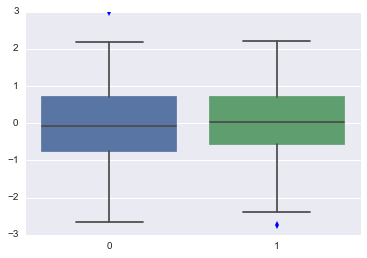

In [6]:
# create two box plots
# notice the outlier points outside of the box plots
sns.boxplot(data = [dataset1, dataset2])

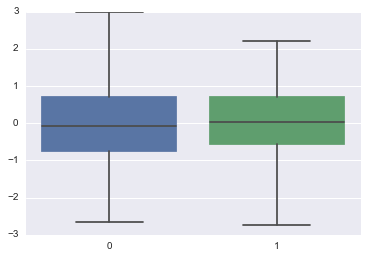

In [7]:
# we can also have the whiskers include the outliers
sns.boxplot(data = [dataset1, dataset2], whis = np.inf)

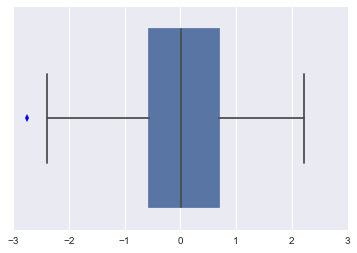

In [9]:
# make the box plot horizontal
sns.boxplot(dataset2, vert = False)

[Violin plots](https://en.wikipedia.org/wiki/Violin_plot) are similar to box plots, except they include a rotated kernal density plot on each side. This means that violin plots show the probability density of the data at different values. 

In [12]:
# create a normal distribution
dataset_normal = stats.norm(0, 5).rvs(100)

# create two gamme distributions, concatenate together
dataset_gamma = np.concatenate([stats.gamma(5).rvs(50) - 1,
                                stats.gamma(5).rvs(50) * (-1)])

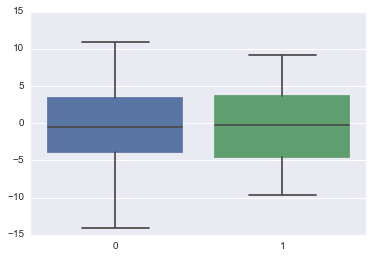

In [13]:
# box plot both of these datasets
sns.boxplot(data = [dataset_normal, dataset_gamma])

Looking at these distributions, we can see that both look fairly similar. The normal distribution dataset is wider in general, but the gamma distribution dataset has more spread in its inner quartiles. 

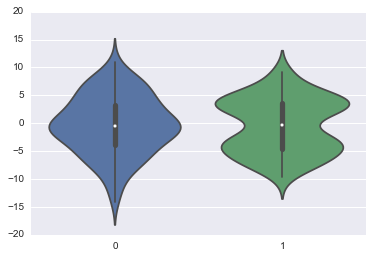

In [14]:
# make violin plots of these datasets
sns.violinplot(data = [dataset_normal, dataset_gamma])

From these plots, you can clearly see the different in the probability density functions of the two datasets. If you look at the plots, the blue plot clearly resembles a normal distribution, and the green is two gamma distributions, one positive and one negative.

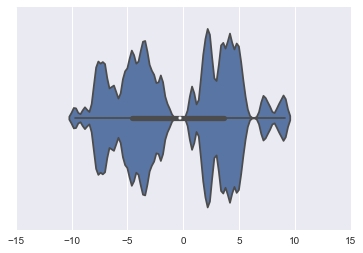

In [23]:
# just like with KDE plots, you can specify your bandwidth
# a very low bandwidth will make the plot very sensitive to frequency
sns.violinplot(dataset_gamma, bw = 0.05)

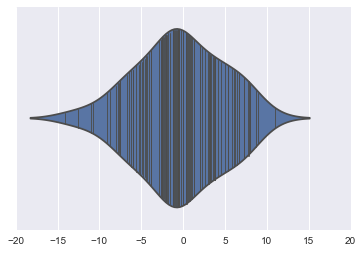

In [24]:
# like a rug plot, we can include the individual data points
# the inner = 'stick' draws a line at each data point
sns.violinplot(dataset_normal, inner = 'stick')

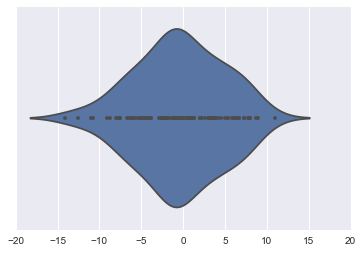

In [26]:
# we can also specify inner = 'point' to show the individual points
sns.violinplot(dataset_normal, inner = 'point')